<a href="https://colab.research.google.com/github/ebyau/Cats_vs_dogs-prediction/blob/master/cats_dogs_with_data_augementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir= tf.keras.utils.get_file('cats_and_dogs_filtered.zip',extract=True,origin=URL)

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print


/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("Total trianing cat images", num_cats_tr)
print("TOtal training dog images", num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)




Total trianing cat images 1000
TOtal training dog images 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE =150

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
#horizontal flip
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               class_mode='binary',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


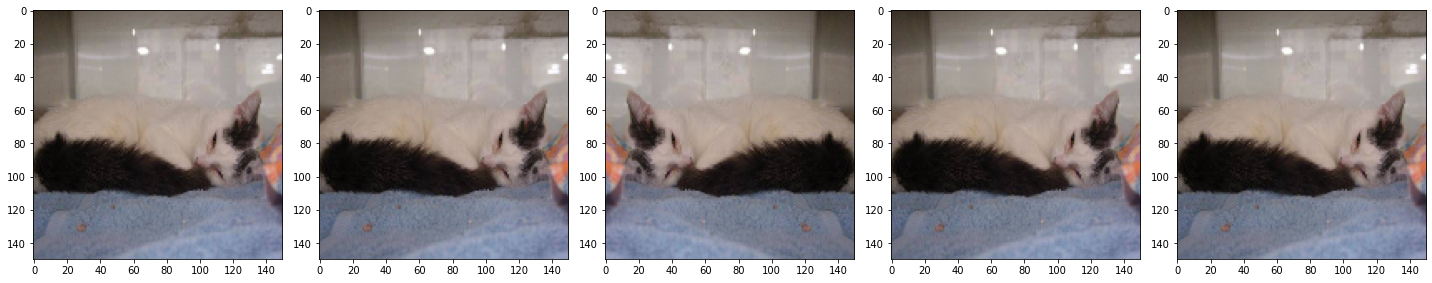

In [0]:
#augemented_images,_ = next(train_data_gen)
augemented_images = [ train_data_gen[0][0][0] for i in range(5) ]
plotImages(augemented_images)

In [0]:
#rotate by 45
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary',
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


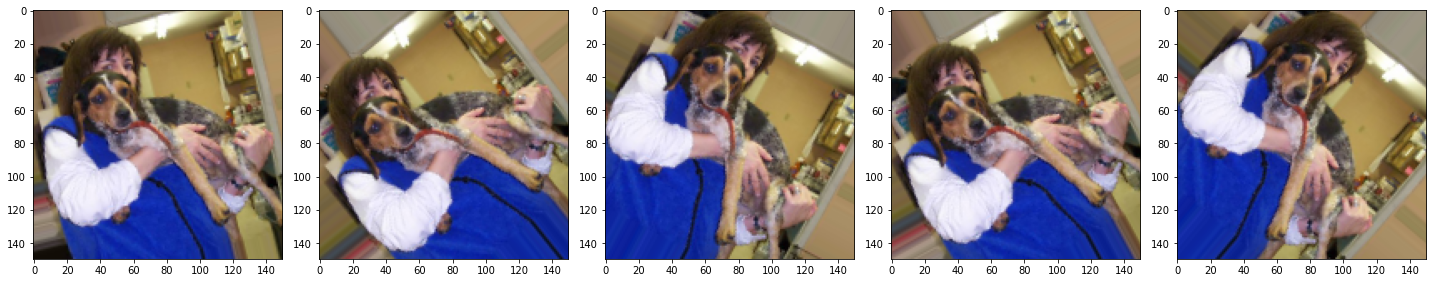

In [0]:
augemented_images = [ train_data_gen[0][0][0] for i in range(5)] 
plotImages(augemented_images)

In [0]:
#Zooming into picture
image_gen = ImageDataGenerator(rescale=1./255, zoom_range = 0.5)
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           shuffle=True,
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


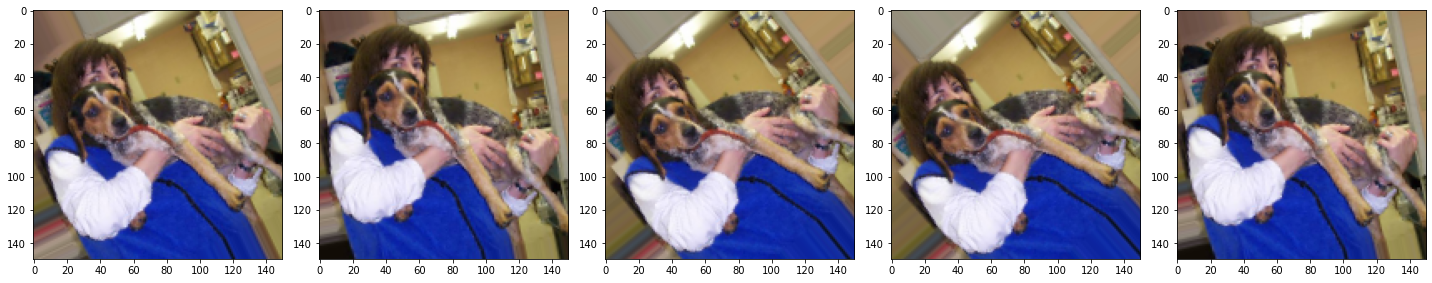

In [0]:
augemented_images = [ train_data_gen[0][0][0] for i in range(5)] 
plotImages(augemented_images)

In [0]:
#combine all augementations
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


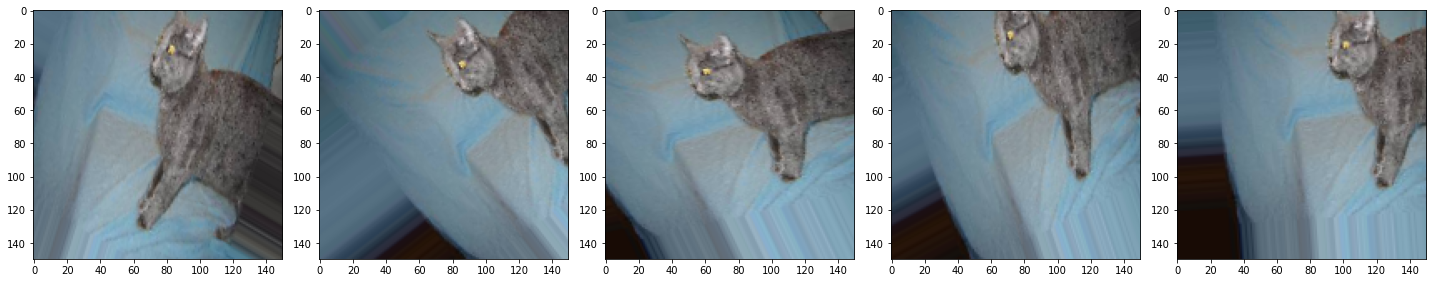

In [0]:
augemented_images = [ train_data_gen[0][0][0] for i in range(5)]
plotImages(augemented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)
validation_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                                     directory=validation_dir,
                                                                     shuffle=False,
                                                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                     class_mode = 'binary'
                                                                    )

Found 1000 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')




                                    


])

In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [0]:
EPOCHS=100
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),epochs=EPOCHS,
                              validation_data = validation_data_gen,
                              validation_steps = int(np.ceil(total_val/float(BATCH_SIZE))))

Epoch 1/100
20/20 [==============================] - 20s 990ms/step - loss: 0.7064 - accuracy: 0.5190 - val_loss: 0.6919 - val_accuracy: 0.5010
Epoch 2/100
20/20 [==============================] - 20s 983ms/step - loss: 0.6872 - accuracy: 0.5415 - val_loss: 0.6697 - val_accuracy: 0.6000
Epoch 3/100
20/20 [==============================] - 20s 992ms/step - loss: 0.6697 - accuracy: 0.5925 - val_loss: 0.6339 - val_accuracy: 0.6470
Epoch 4/100
20/20 [==============================] - 20s 986ms/step - loss: 0.6755 - accuracy: 0.5630 - val_loss: 0.6622 - val_accuracy: 0.6600
Epoch 5/100
20/20 [==============================] - 20s 994ms/step - loss: 0.6499 - accuracy: 0.6195 - val_loss: 0.6183 - val_accuracy: 0.6510
Epoch 6/100
20/20 [==============================] - 20s 1s/step - loss: 0.6374 - accuracy: 0.6190 - val_loss: 0.5953 - val_accuracy: 0.7000
Epoch 7/100
20/20 [==============================] - 20s 998ms/step - loss: 0.6365 - accuracy: 0.6245 - val_loss: 0.5923 - val_accuracy: 0.

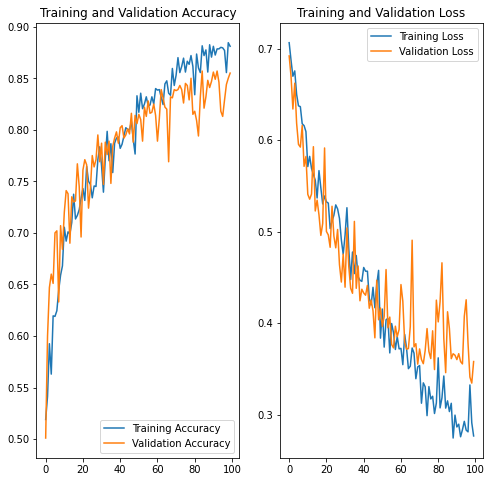

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 100
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()